In [9]:
import numpy as np
import karabo_bridge as kb
import karabo_data as kd
import pylab as plt



In [15]:
path = '/gpfs/exfel/exp/SQS/201921/p002430/raw'
run = '/r0132'

In [16]:
runData = kd.RunDirectory(path+run)

In [17]:
runData.detector_sources

set()

In [18]:
runData.control_sources

frozenset({'FUSION_CDG',
           'P_GATT',
           'SA3_XTD10_MONO/MDL/PHOTON_ENERGY',
           'SA3_XTD10_VAC/GAUGE/G30510C',
           'SA3_XTD10_XGM/XGM/DOOCS',
           'SQS_DPU_LIC/CAM/YAG_UPSTR',
           'SQS_DPU_LIC/MOTOR/YAG_Y_UPSTR',
           'SQS_DPU_LIC/PROC/YAG_UPSTR',
           'SQS_NQS_CRSC/ACTRL/SLIT_Z_WIDTH',
           'SQS_NQS_CRSC/ASENS/SLIT_Z_WIDTH',
           'SQS_NQS_CRSC/GAUGE/STAGE_1',
           'SQS_NQS_CRSC/GAUGE/STAGE_2',
           'SQS_NQS_CRSC/GAUGE/STAGE_3',
           'SQS_NQS_CRSC/MOTOR/NOZZLE_X',
           'SQS_NQS_CRSC/MOTOR/NOZZLE_Y',
           'SQS_NQS_CRSC/MOTOR/NOZZLE_Z',
           'SQS_NQS_CRSC/TSYS/PARKER_TRIGGER',
           'SQS_NQS_DVMIS/TSYS/BEHLKE-1_TRIGGER',
           'SQS_NQS_DVMIS/TSYS/BEHLKE-2_TRIGGER',
           'SQS_NQS_MCPSCD/TSYS/CAMERA_TRIGGER',
           'SQS_NQS_TPAD/TSYS/CAM_TRIGGER',
           'SQS_NQS_VAC/GAUGE/DUMP',
           'SQS_RR_UTC/TSYS/TIMESERVER'})

In [5]:
runData.

SyntaxError: invalid syntax (<ipython-input-5-2c027215b33a>, line 1)

In [6]:

for tid, data in runData.trains():
    print("Processing train", tid)
    tofdata = data['SQS_DIGITIZER_UTC1/ADC/1:network']['digitizers.channel_1_A.raw.samples']
    break

Processing train 100943859


In [7]:
tofdata

array([-7, -7, -5, ..., -9, -8, -8], dtype=int16)

In [13]:
runData.info()

# of trains:    640
Duration:       0:01:03.900000
First train ID: 100943859
Last train ID:  100944498

0 detector modules ()

4 instrument sources (excluding detectors):
  - SA3_XTD10_XGM/XGM/DOOCS:output
  - SQS_DIGITIZER_UTC1/ADC/1:network
  - SQS_DPU_LIC/CAM/YAG_UPSTR:daqOutput
  - SQS_DPU_LIC/PROC/YAG_UPSTR:output

23 control sources:
  - FUSION_CDG
  - P_GATT
  - SA3_XTD10_MONO/MDL/PHOTON_ENERGY
  - SA3_XTD10_VAC/GAUGE/G30510C
  - SA3_XTD10_XGM/XGM/DOOCS
  - SQS_DPU_LIC/CAM/YAG_UPSTR
  - SQS_DPU_LIC/MOTOR/YAG_Y_UPSTR
  - SQS_DPU_LIC/PROC/YAG_UPSTR
  - SQS_NQS_CRSC/ACTRL/SLIT_Z_WIDTH
  - SQS_NQS_CRSC/ASENS/SLIT_Z_WIDTH
  - SQS_NQS_CRSC/GAUGE/STAGE_1
  - SQS_NQS_CRSC/GAUGE/STAGE_2
  - SQS_NQS_CRSC/GAUGE/STAGE_3
  - SQS_NQS_CRSC/MOTOR/NOZZLE_X
  - SQS_NQS_CRSC/MOTOR/NOZZLE_Y
  - SQS_NQS_CRSC/MOTOR/NOZZLE_Z
  - SQS_NQS_CRSC/TSYS/PARKER_TRIGGER
  - SQS_NQS_DVMIS/TSYS/BEHLKE-1_TRIGGER
  - SQS_NQS_DVMIS/TSYS/BEHLKE-2_TRIGGER
  - SQS_NQS_MCPSCD/TSYS/CAMERA_TRIGGER
  - SQS_NQS_TPAD/TSYS/C

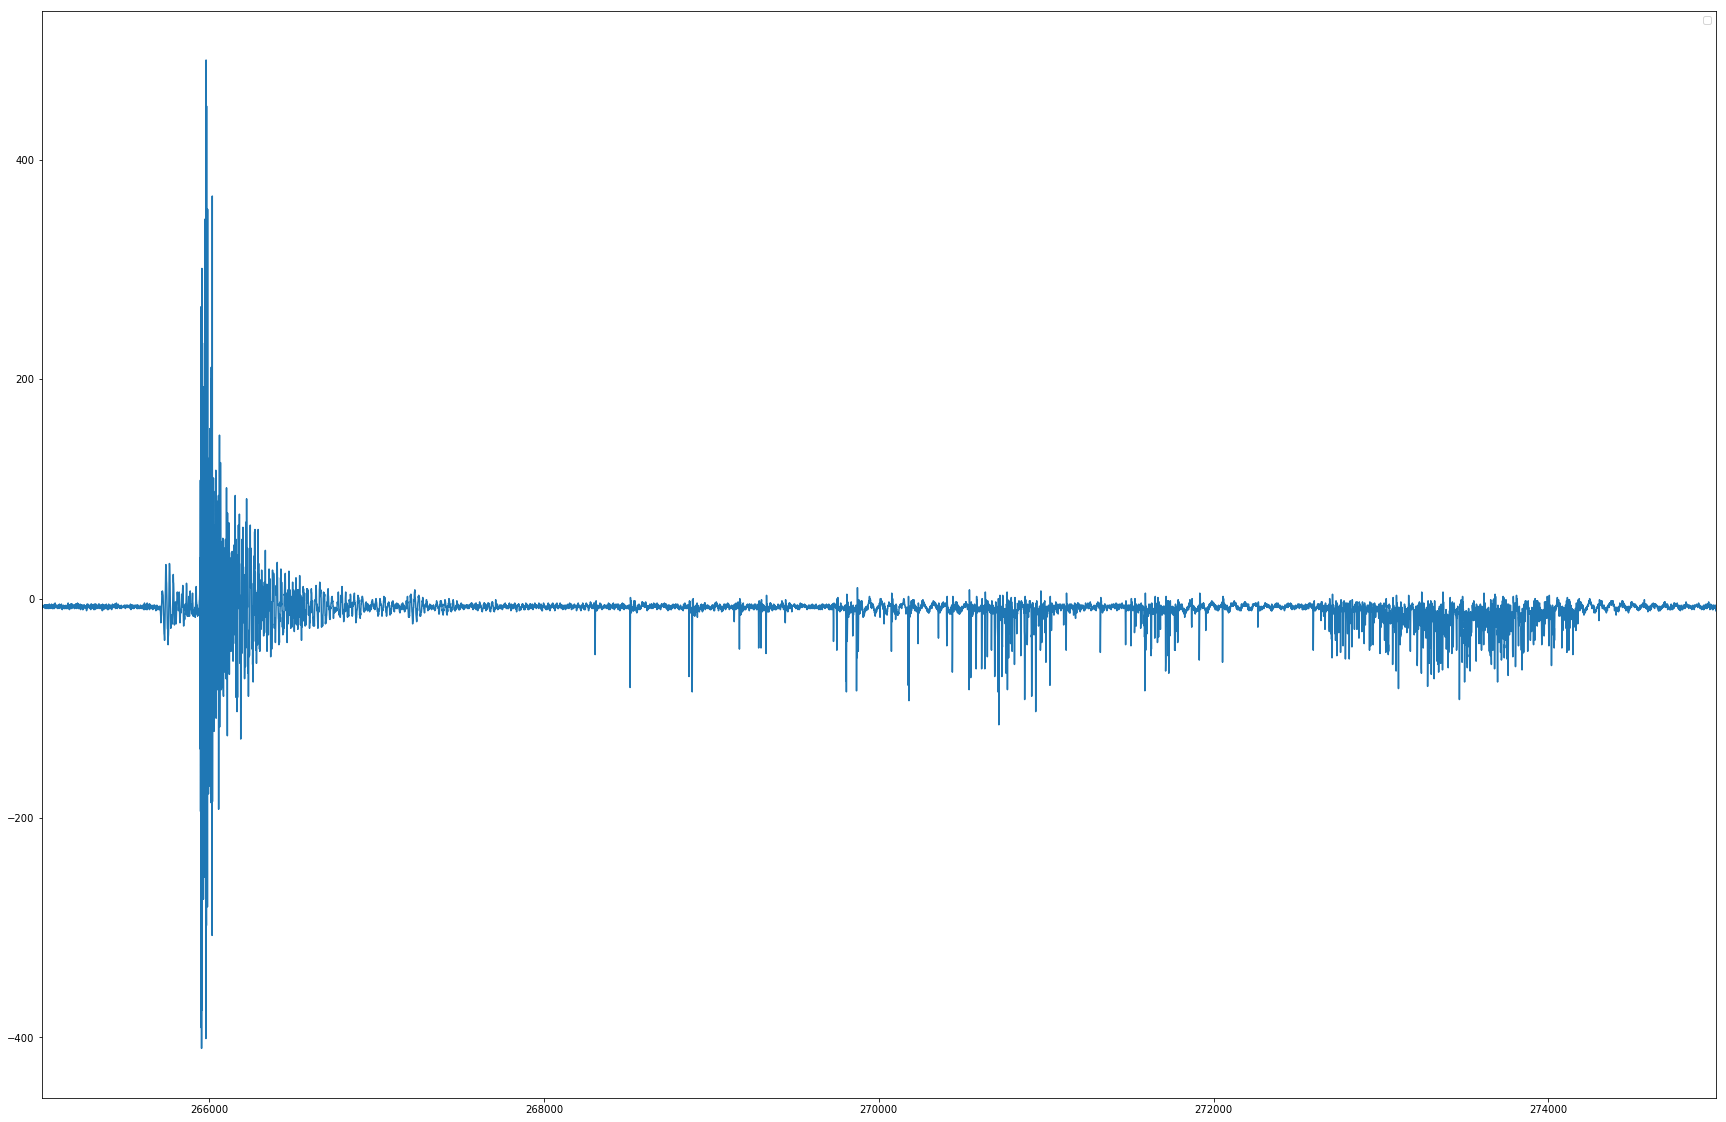

In [10]:
plt.figure(figsize = (30,20))
plt.plot(tofdata)
plt.xlim(265000,275000)
plt.legend()